In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IndianHouses.csv")

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# Data Preprocessing Part 1

In [6]:
df.select_dtypes(include='object').nunique()

Furnishing       3
Locality       365
Status           2
Transaction      2
Type             2
dtype: int64

In [9]:
df['Locality']

0                                        Rohini Sector 25
1                  J R Designers Floors, Rohini Sector 24
2                     Citizen Apartment, Rohini Sector 13
3                                        Rohini Sector 24
4       Rohini Sector 24 carpet area 650 sqft status R...
                              ...                        
1254                                    Chittaranjan Park
1255                                    Chittaranjan Park
1256                                    Chittaranjan Park
1257                            Chittaranjan Park Block A
1258                                    Chittaranjan Park
Name: Locality, Length: 1259, dtype: object

In [12]:
df['Locality'] = df['Locality'].str.split(' ').str[1]

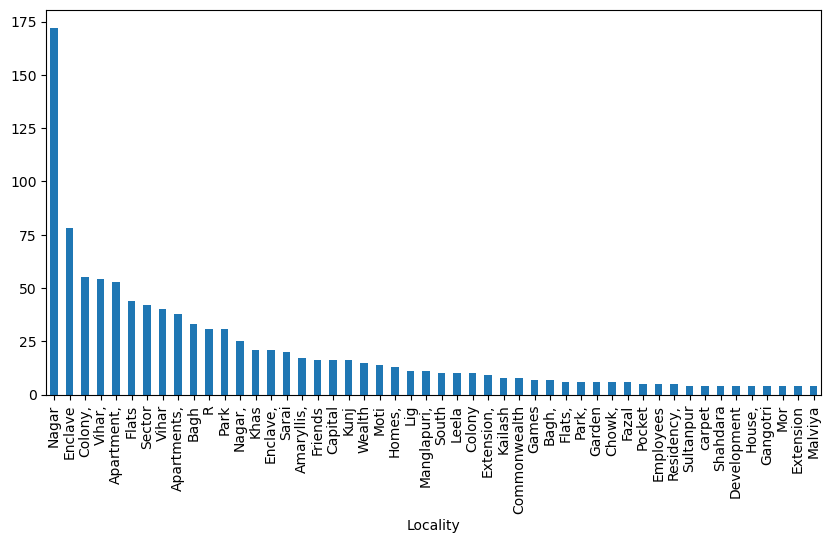

In [13]:
plt.figure(figsize=(10,5))
df['Locality'].value_counts().head(50).plot(kind = 'bar')
plt.show()

In [14]:
df['Locality'].nunique()


119

In [15]:
df.drop('Locality',axis=1,inplace=True)

# Handling Missing Values

In [16]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [18]:
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Per_Sqft'].mean())

In [21]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Parking'] = df['Parking'].fillna(df['Parking'].mode()[0])
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

In [22]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# Handle DataTypes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1259 non-null   object 
 4   Parking      1259 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1259 non-null   object 
 9   Per_Sqft     1259 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [25]:
df['Bathroom'] = df['Bathroom'].astype('int')

In [26]:
df['Parking'] = df['Parking'].astype('int')

# Exploratory Data Analysis

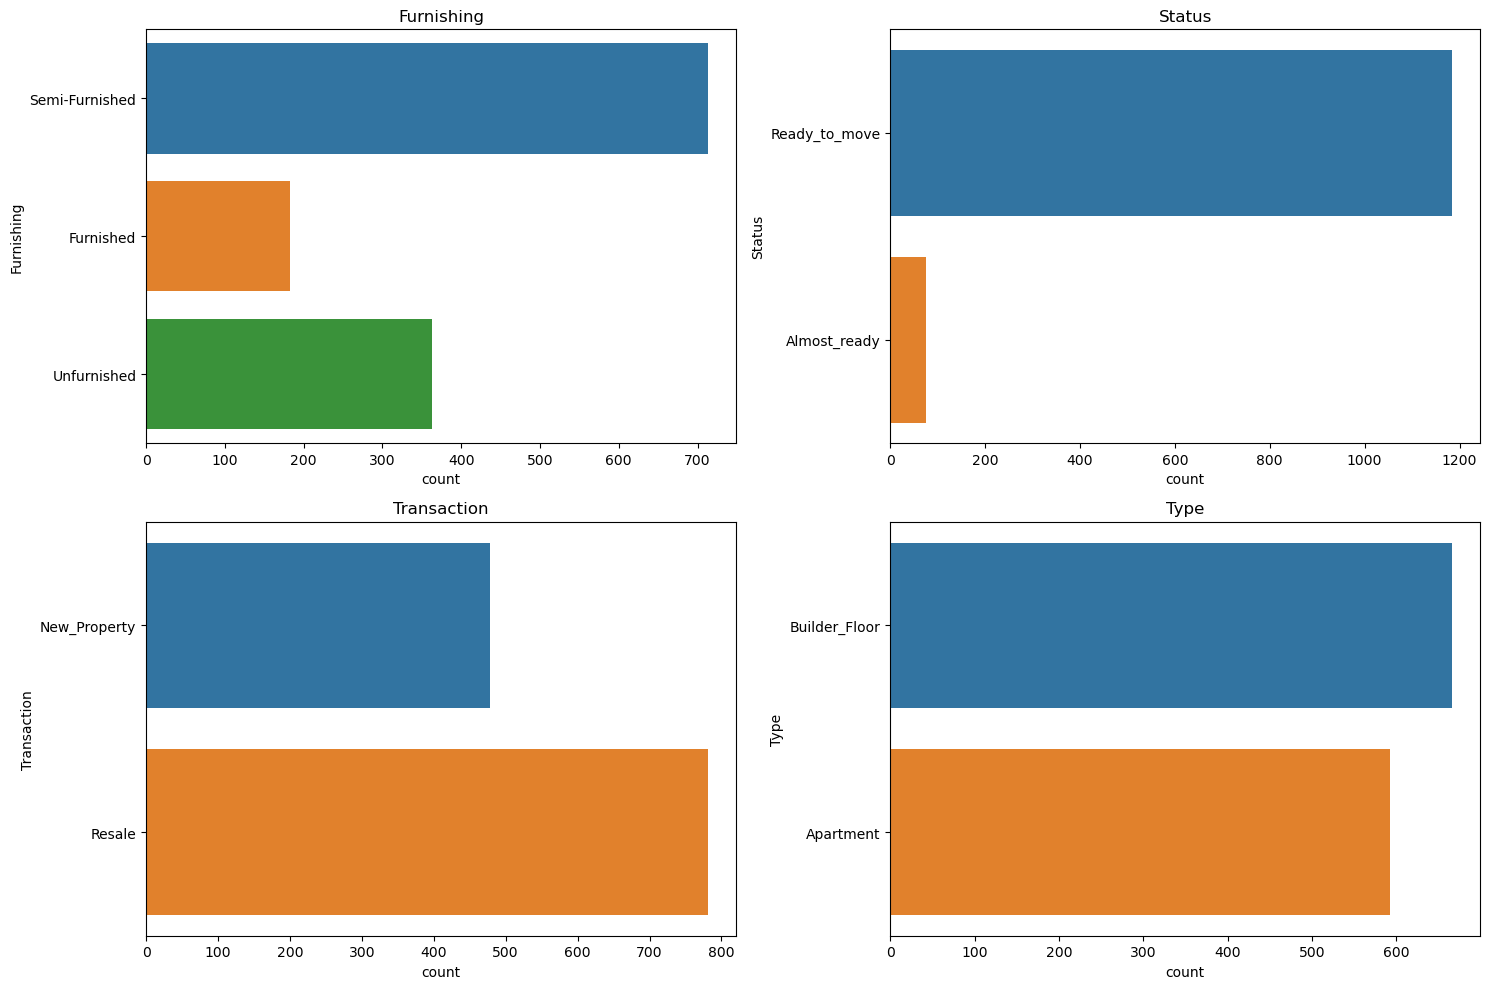

In [28]:
category = ['Furnishing','Status','Transaction','Type']

num_cols = len(category)

fig ,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

axs = axs.flatten()

for i, var in enumerate(category):
    sns.countplot(y=var,data=df,ax=axs[i])
    axs[i].set_title(var)
    
    
if num_cols < len(axs):
    for i in range(nums_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
        
        
fig.tight_layout()
plt.show()

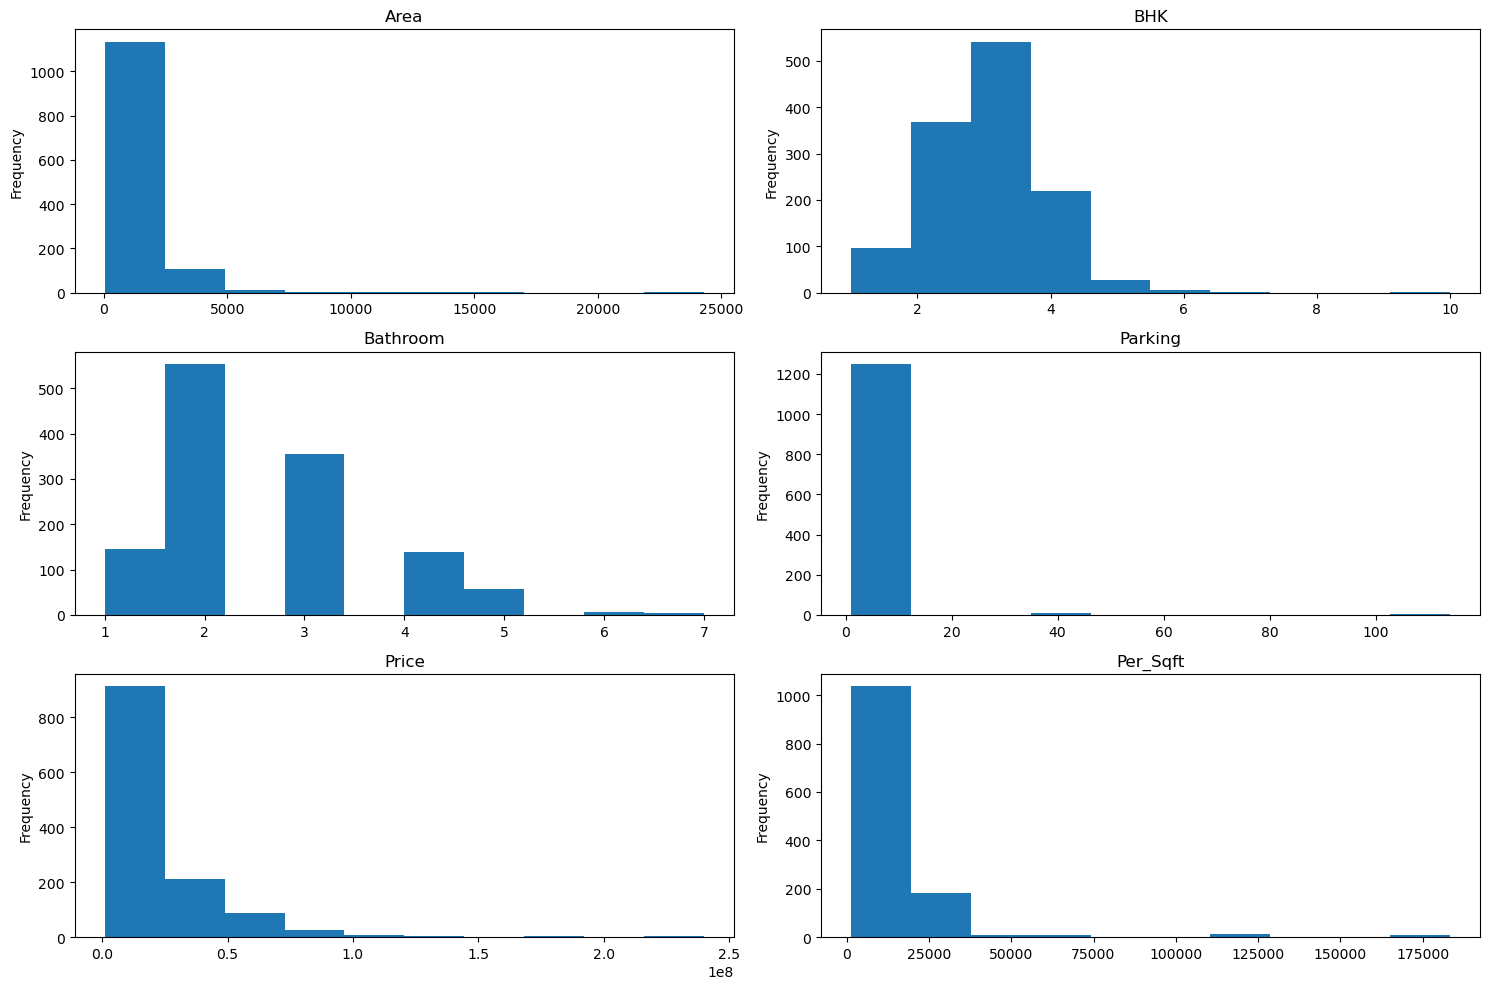

In [30]:
int_vars = df.select_dtypes(include=['int','float'])
num_cols = len(int_vars)

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    df[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)
    
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
fig.tight_layout()
plt.show()

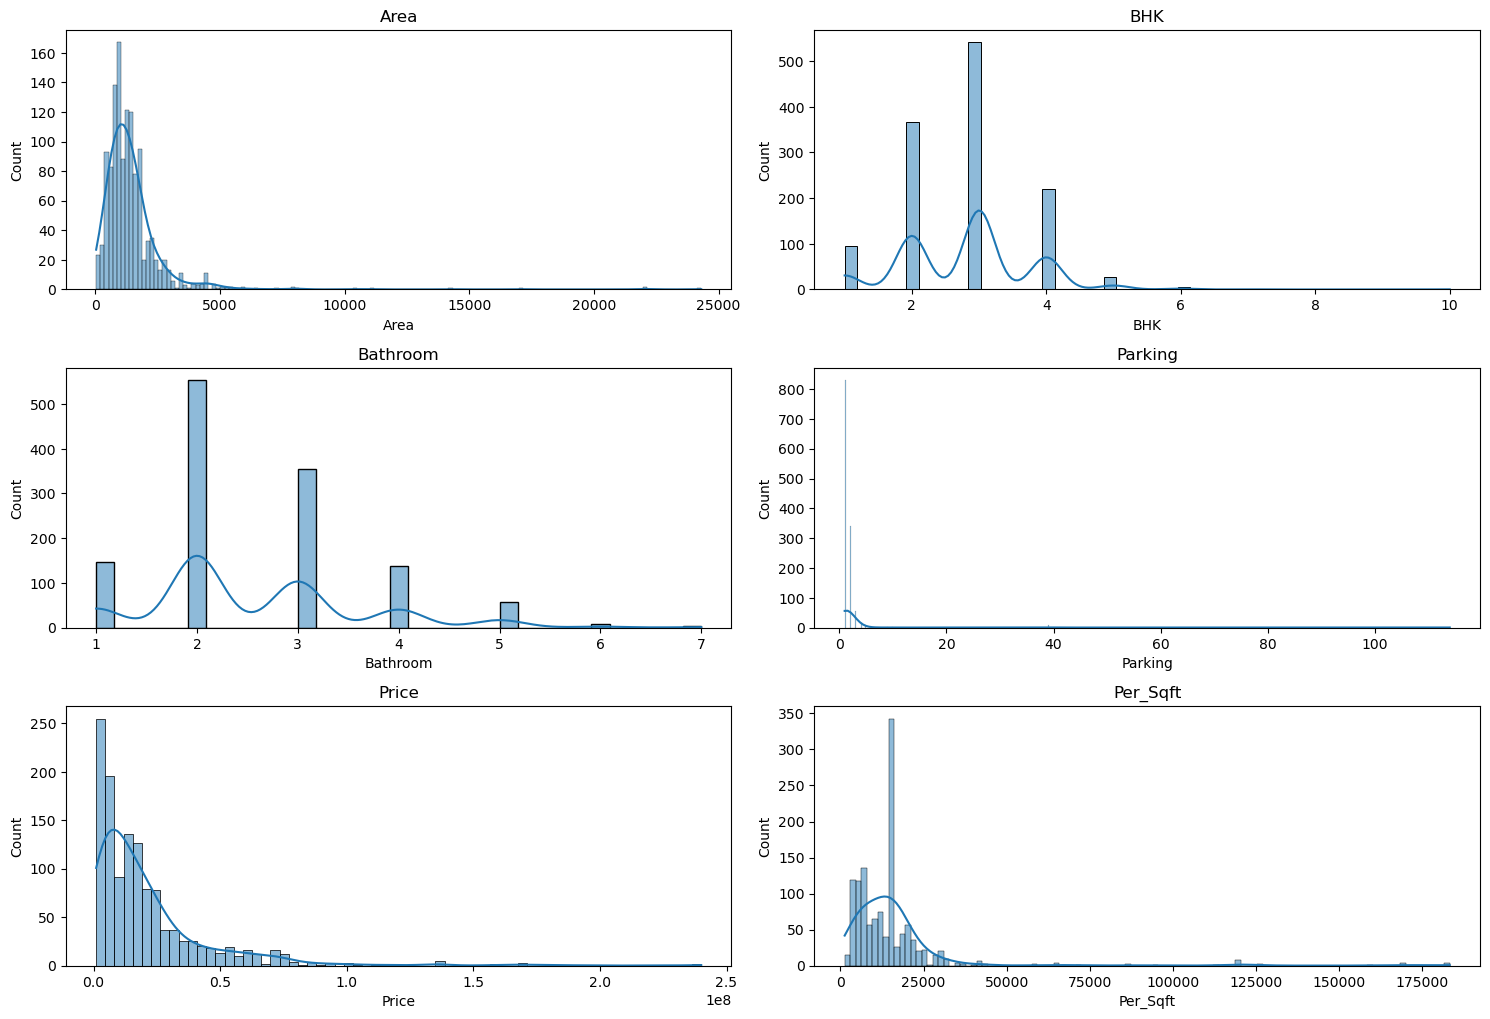

In [32]:
num = df.select_dtypes(include=['int','float']).columns.tolist()
col= len(num)

fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i, var in enumerate(num):
    sns.histplot(data=df,x=var,kde=True,ax=axs[i])
    axs[i].set_title(var)
    
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

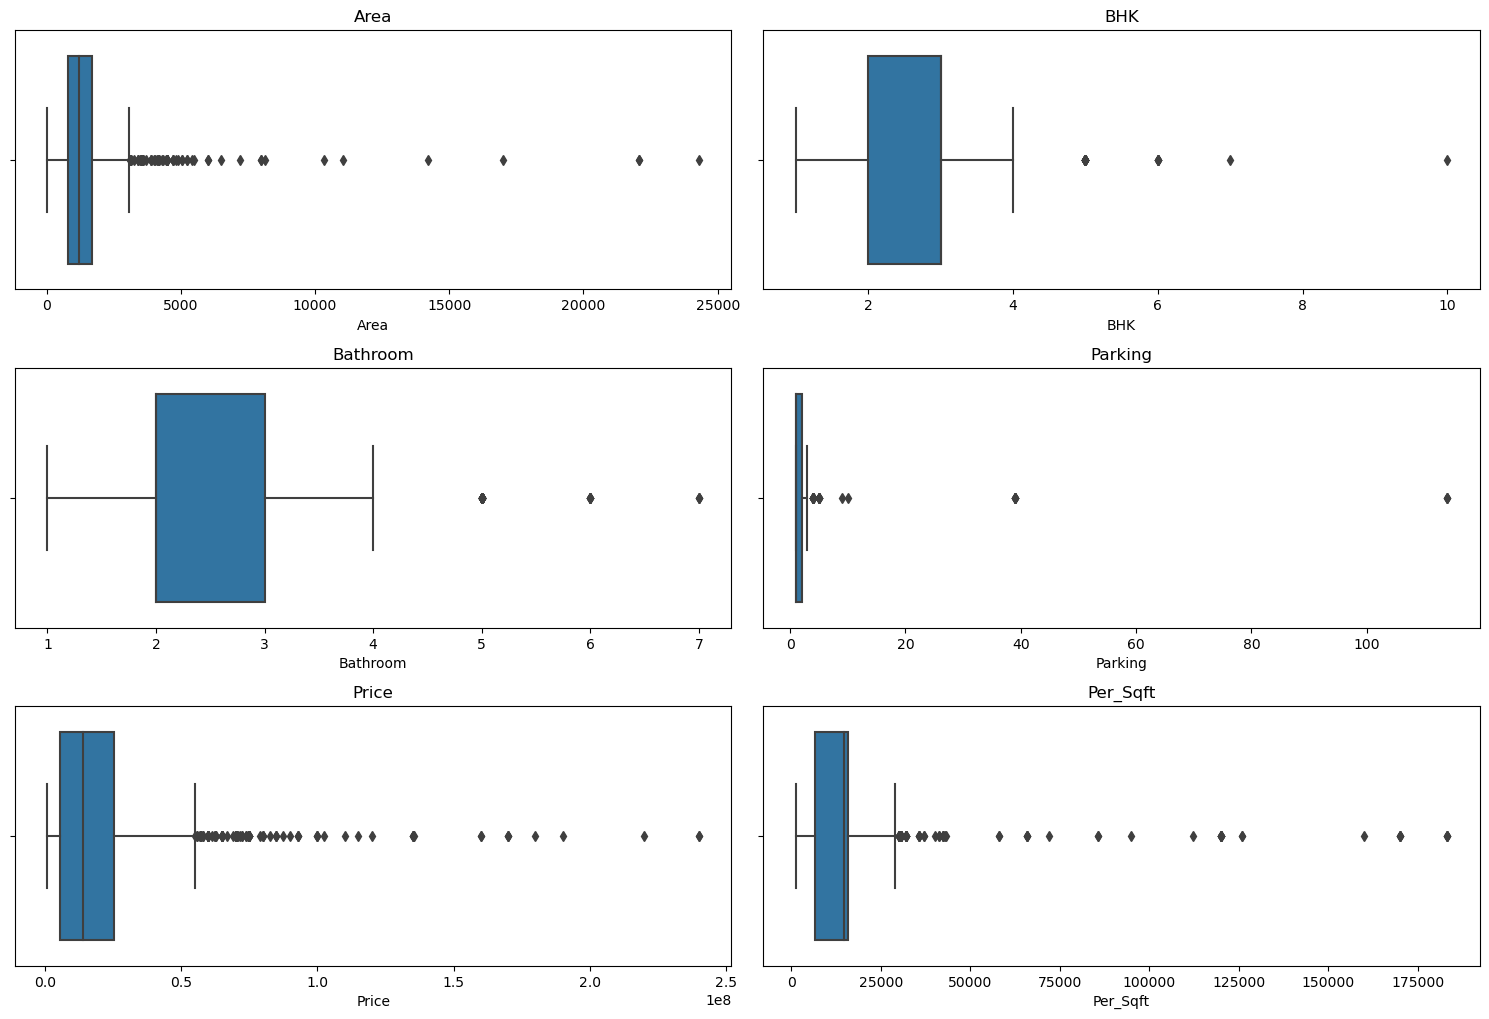

In [33]:
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs= axs.flatten()

for i, var in enumerate(num):
    sns.boxplot(data=df,x=var,ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])
    
    
fig.tight_layout()
plt.show()

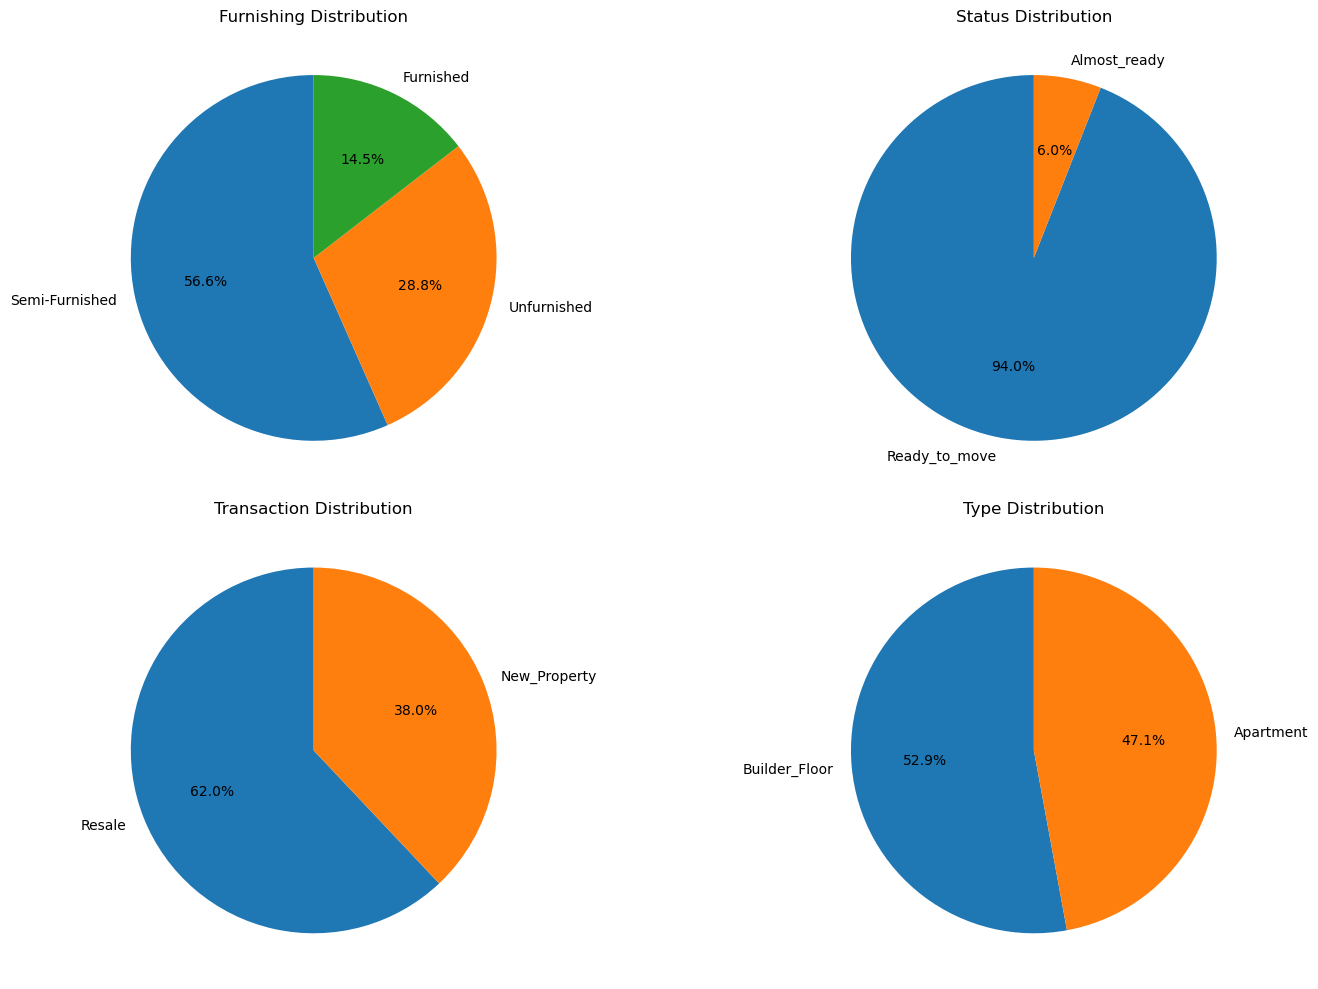

In [34]:
category = df.select_dtypes(include='object')

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

for i, var in enumerate(category):
    if i < len(axs.flat):
        
        cat_counts = df[var].value_counts()
        
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct="%1.1f%%", startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
                              

            
fig.tight_layout()
plt.show()

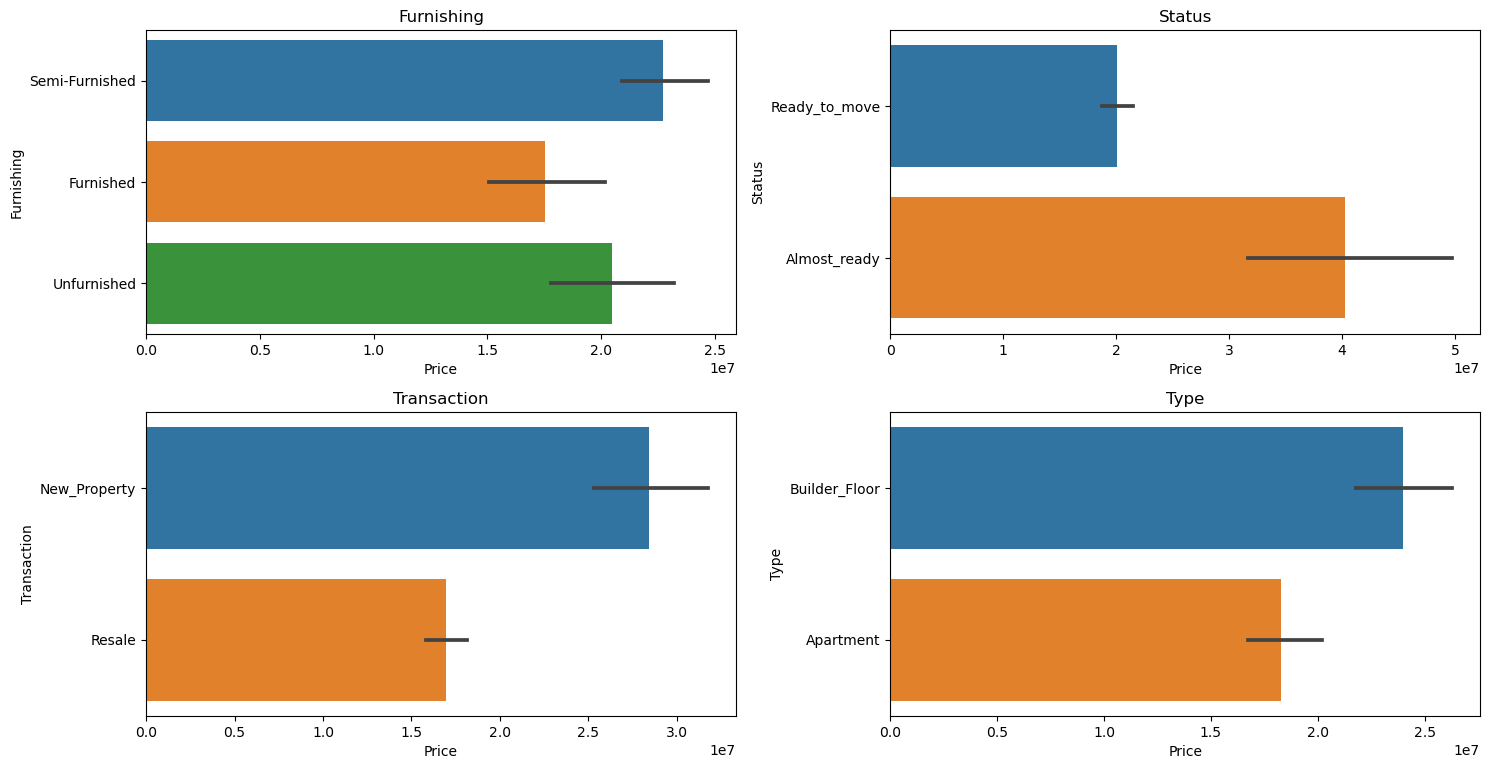

In [35]:
cat = ['Furnishing','Status','Transaction','Type']
col = len(cat)

fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))

axs = axs.flatten()

for i, var in enumerate(cat):
    sns.barplot(x='Price',y=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])
        
fig.tight_layout()
plt.show()

# Data Preprocessing Part 2

In [37]:
#print all unique values that are in categorical feature

for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}:{df[col].unique()}')

Furnishing:['Semi-Furnished' 'Furnished' 'Unfurnished']
Status:['Ready_to_move' 'Almost_ready']
Transaction:['New_Property' 'Resale']
Type:['Builder_Floor' 'Apartment']


In [42]:
from sklearn import preprocessing

for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} : {df[col].unique()}')

Furnishing : [1 0 2]
Status : [1 0]
Transaction : [0 1]
Type : [1 0]


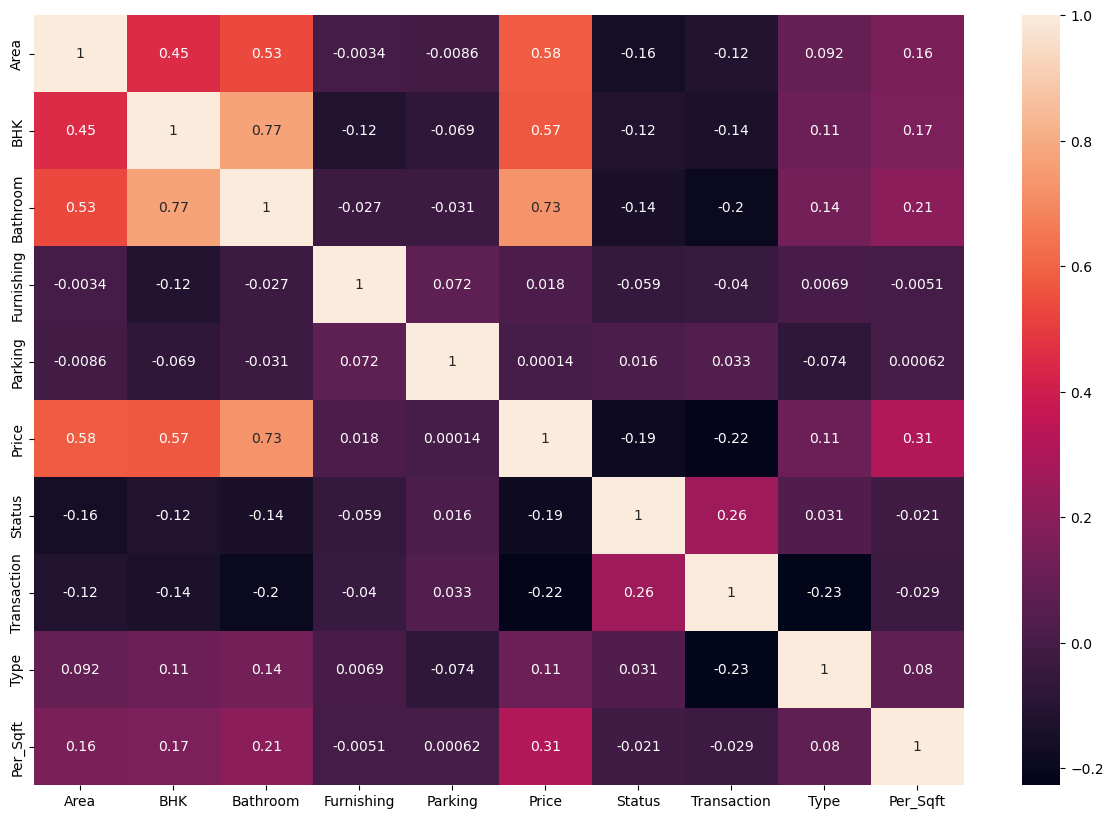

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

# Train Test Split

In [46]:
x = df.drop('Price',axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Removing Outliers

In [49]:
from scipy import stats

selected_col = ['Area','BHK','Bathroom','Parking','Per_Sqft']

z_scores = np.abs(stats.zscore(x_train[selected_col]))

threshold = 3

outlier_indices = np.where(z_scores > threshold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
lr.score(x_train,y_train)

0.7509713316584675